In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os
from datetime import datetime
from scipy.fft import ifft2, fft2
import agent
import analyse
import visualise




In [2]:
def read(title):
    '''Opens specified data file containing simulation details and phase values'''
    return pickle.load(open('data/' + title +'.p', 'rb'))

def set_model(title):
    file = read(title)
    uploaded = agent.Kuramoto(file['stats']['tmax'], file['stats']['N'],file['stats']['M'],file['stats']['sigma'],
                        file['stats']['eta'],file['stats']['bc'],file['stats']['grad'])
    uploaded.omegas = file['omegas']
    uploaded.theta = file['theta']
    uploaded.title = title
    return uploaded

def todo(tmax, sigma, eta, bc, grad, shape):
    t_max = tmax
    length = 128
    # length= 64
    if shape == '2D':
        height = 128
        model = agent.Kuramoto(t_max, height, length, sigma, eta, bc, grad)
        model.solve(dim=2)
        print('2D solved')
        model.save()
        visualise.plot2D_frame(model.tmax - 2, model)
        print('2D saved')
    elif shape == 'q2D':
        height = 20
        model = agent.Kuramoto(t_max, height, length, sigma, eta, bc, grad)
        model.solve(dim=2)
        print('2D solved')
        model.save()
        visualise.plot2D_frame(model.tmax - 2, model)
        print('2D saved')
    elif shape == '1D':
        model = agent.Kuramoto(t_max, length, 1, sigma, eta, bc, grad)
        model.solve()
        print('1D solved')
        model.save()
        visualise.plot1D_frame(model,t = -2)
        print('1D saved')
    else:
        print('Error shape not present')
        return
    return model.title,model


def custom():
    custom = agent.Kuramoto(1000, 20, 128, 0.1, 0.5, 'custom', [0, 0])
    custom.omegas[10][64] = 2
    custom.solve(2)
    custom.save()
    visualise.animate(custom, False)


def remove_harmonics(filename):
    analyse.remove_harmonic(read(filename), set_model(filename))

2D solved
{'N': 20, 'M': 128, 'tmax': 1000, 'sigma': 0, 'eta': 0.2, 'bc': 'fix', 'grad': [0, 0], 'dim': 'q2D'}


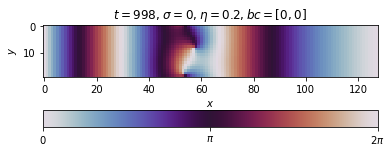

2D saved


AttributeError: 'tuple' object has no attribute 'theta'

<Figure size 432x288 with 0 Axes>

In [4]:
title, model =todo(1000,0,0.2,'fix',[0,0],'q2D')


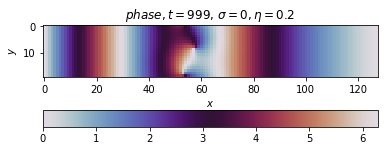

In [5]:
model = model[1]
visualise.animate(model,False,'phase')